In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import pandas as pd
C = 10**(-6)
L = 20*10**(-3) 

In [3]:
r = 50
uz = np.array([[0.86, 0.86, 0.86],[1.04, 1.32, 1.44], [1.64, 1.52, 1.4], [1.51, 1.33, 1.21]])*(2**0.5)
ur = np.array([[0.43, 0.43,0.43], [0.64, 0.54, 0.45], [0.27, 0.41, 0.5], [0.24, 0.32, 0.35]])*(2**0.5)
I = ur/r
z = uz/I 
f = np.array([500, 800, 1100])
w = 2*np.pi*f
zt = [z[0], w*20*10**(-3), 1/w/10**(-6), (10000 + (1/w/10**(-6))**2)**0.5]
data = np.around([I[0], z[0], zt[0], I[1], z[1], zt[1], I[2], z[2], zt[2], I[3], z[3], zt[3]],3)
df = pd.DataFrame(data, columns = ["500 Hz", "800 Hz", "1100 Hz"], index = ["I1, A", "Z1 (100 Ом), Ом", "Zt1 (R), Ом", "I2, A", "Z2 (20 мГн), Ом", "Zt2 (wL), Ом", "I3, A", "Z3 (1 мкФ), Ом","Zt3 (1/wC), Ом", "I4, A","Z4 (100 Ом + 1 мкФ), Ом", "Zt4 (sqrt(R**2+(1/wc)**2)), Ом"])
df

,500 Hz,800 Hz,1100 Hz
"I1, A",0.012,0.012,0.012
"Z1 (100 Ом), Ом",100.000,100.000,100.000
"Zt1 (R), Ом",100.000,100.000,100.000
"I2, A",0.018,0.015,0.013
"Z2 (20 мГн), Ом",81.250,122.222,160.000
"Zt2 (wL), Ом",62.832,100.531,138.230
"I3, A",0.008,0.012,0.014
"Z3 (1 мкФ), Ом",303.704,185.366,140.000
"Zt3 (1/wC), Ом",318.310,198.944,144.686
"I4, A",0.007,0.009,0.010


In [72]:
fi = np.array([np.arcsin(10/11), np.arcsin(8/9.5), np.arcsin(7/9)])
fiteor = np.arctan(1/1/w/10**(-6)/100)
data = np.around([np.rad2deg(fi), np.rad2deg(fiteor), I[3]*uz[3]/2*100/z[3]*1000],3)
print(I[3], uz[3])
df = pd.DataFrame(data, columns = ["500 Hz", "800 Hz", "1100 Hz"], index = ["fi, deg", "fiteor, deg", "P (Um*Im/2 * (R/Z), мВт"])
df

[0.00678823 0.00905097 0.00989949] [2.13546248 1.88090404 1.71119841]


,500 Hz,800 Hz,1100 Hz
"fi, deg",65.380,57.363,51.058
"fiteor, deg",72.559,63.313,55.350
"P (Um*Im/2 * (R/Z), мВт",2.304,4.096,4.900


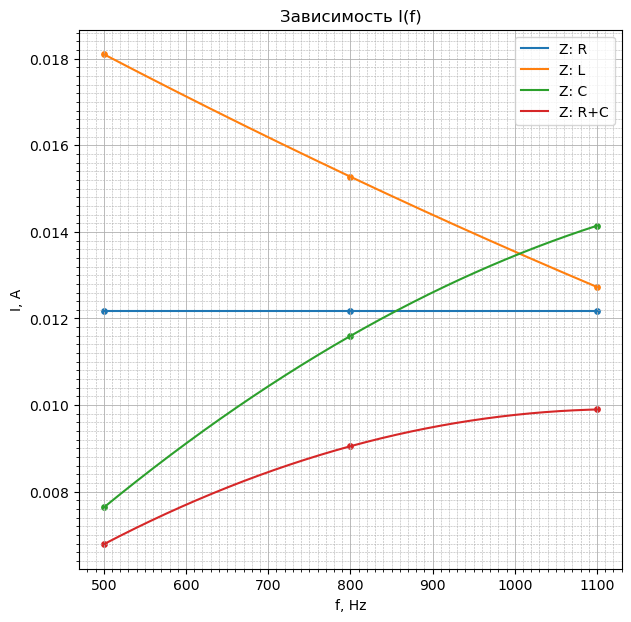

In [5]:
fig, axs = plt.subplots(1,1, figsize = (7,7))
x = np.linspace(500, 1100, 800)
axs.set_title("Зависимость I(f)")
axs.set_xlabel("f, Hz")
axs.set_ylabel("I, А")
axs.minorticks_on()
axs.scatter(f, I[0], s = 15)
k = np.polyfit(f,I[0], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: R") 
axs.scatter(f, I[1], s = 15)
k = np.polyfit(f,I[1], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: L")
axs.scatter(f, I[2], s = 15)
k = np.polyfit(f,I[2], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: C")
axs.scatter(f, I[3], s = 15)
k = np.polyfit(f,I[3], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: R+C")
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
axs.legend()
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)

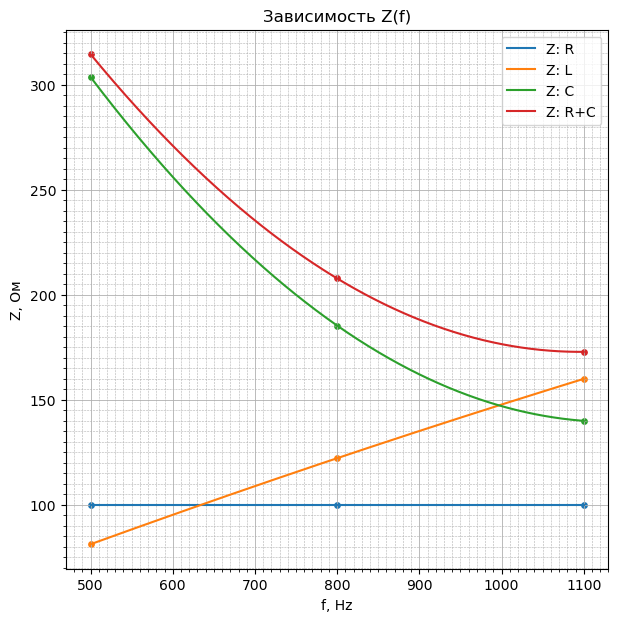

In [6]:
fig, axs = plt.subplots(1,1, figsize = (7,7))
x = np.linspace(500, 1100, 800)
axs.set_title("Зависимость Z(f)")
axs.set_xlabel("f, Hz")
axs.set_ylabel("Z, Ом")
axs.minorticks_on()
axs.scatter(f, z[0], s = 15)
k = np.polyfit(f,z[0], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: R") 
axs.scatter(f, z[1], s = 15)
k = np.polyfit(f,z[1], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: L")
axs.scatter(f, z[2], s = 15)
k = np.polyfit(f,z[2], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: C")
axs.scatter(f, z[3], s = 15)
k = np.polyfit(f,z[3], 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: R+C")
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
axs.legend()
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)

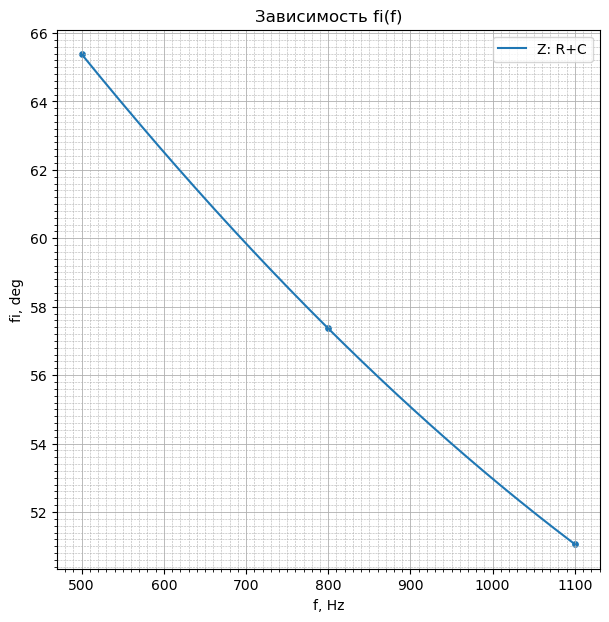

In [7]:
fig, axs = plt.subplots(1,1, figsize = (7,7))
x = np.linspace(500, 1100, 800)
axs.set_title("Зависимость fi(f)")
axs.set_xlabel("f, Hz")
axs.set_ylabel("fi, deg")
axs.minorticks_on()
axs.scatter(f, np.rad2deg(fi), s = 15)
k = np.polyfit(f,np.rad2deg(fi), 2)
axs.plot(x, k[0]*x**2+k[1]*x+k[2], label = "Z: R+C")
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
axs.legend()
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)

14.142135623730951


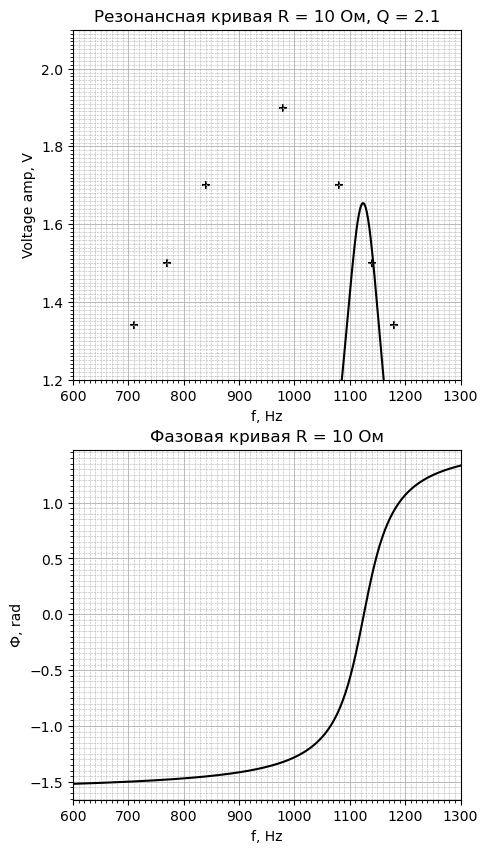

In [71]:
#Резонанс кривые
fig, axs = plt.subplots(2,1, figsize = (5,10))
Uv = np.array([1.34, 1.5, 1.7, 1.9, 1.7, 1.5, 1.34])
f = np.array([710, 770, 840, 980, 1080, 1140, 1180])
Q = 980/(1180-710)
b = 10/2/L
w0 = 980*2*np.pi
Q2 = 1/10*(L/C)**0.5
u0 = 1.9*2*b*w0*(1-(b/w0)**2)**0.5
print(Q2)
axs[0].set_xlim(600, 1300)
axs[0].set_ylim(1.2, 2.1)
axs[0].set_title(f"Резонансная кривая R = 10 Ом, Q = {round(Q, 1)}")
axs[0].set_xlabel("f, Hz")
axs[0].set_ylabel("Voltage amp, V")
axs[0].minorticks_on()
axs[0].scatter(f, Uv, s = 35, color = "black", marker = "+")
axs[0].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(20))
axs[0].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[0].grid(which = 'major', linewidth = 0.6)
x = np.linspace(600, 1300, 600)
y = np.arctan((x*np.pi*40*10**(-3)-1/(x*2*np.pi*10**(-6)))/10)
axs[1].set_xlim(600,1300)
axs[1].plot(x, y, color = "black")
axs[1].set_title(f"Фазовая кривая R = 10 Ом")
axs[1].set_xlabel("f, Hz")
axs[1].set_ylabel("Ф, rad")
axs[1].minorticks_on()
axs[1].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[1].grid(which = 'major', linewidth = 0.6)
rez = u0/((1/L/C-(x*2*np.pi)**2)**2+(2*b*x*2*np.pi)**2)**0.5
axs[0].plot(x, rez, color = "black")
plt.show()

7.0710678118654755


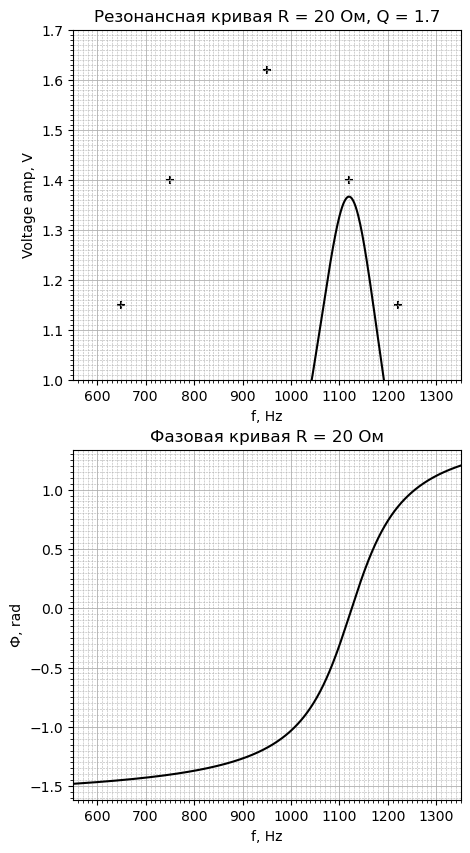

In [70]:
#Резонанс кривые
fig, axs = plt.subplots(2,1, figsize = (5,10))
Uv = np.array([1.15, 1.4, 1.62, 1.4, 1.15])
f = np.array([650, 750, 950, 1120, 1220])
Q = 950/(1220-650)
b = 20/2/L
w0 = 950*2*np.pi
Q2 = 1/20*(L/C)**0.5
u0 = 1.62*2*b*w0*(1-(b/w0)**2)**0.5
print(Q2)
axs[0].set_xlim(550, 1350)
axs[0].set_ylim(1, 1.7)
axs[0].set_title(f"Резонансная кривая R = 20 Ом, Q = {round(Q, 1)}")
axs[0].set_xlabel("f, Hz")
axs[0].set_ylabel("Voltage amp, V")
axs[0].minorticks_on()
axs[0].scatter(f, Uv, s = 35, color = "black", marker = "+")
axs[0].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(10))
axs[0].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[0].grid(which = 'major', linewidth = 0.6)
x = np.linspace(550, 1350, 600)
y = np.arctan((x*np.pi*40*10**(-3)-1/(x*2*np.pi*10**(-6)))/20)
axs[1].set_xlim(550,1350)
axs[1].plot(x, y, color = "black")
axs[1].set_title(f"Фазовая кривая R = 20 Ом")
axs[1].set_xlabel("f, Hz")
axs[1].set_ylabel("Ф, rad")
axs[1].minorticks_on()
axs[1].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[1].grid(which = 'major', linewidth = 0.6)
rez = u0/((1/L/C-(x*2*np.pi)**2)**2+(2*b*x*2*np.pi)**2)**0.5
axs[0].plot(x, rez, color = "black")
plt.show()

4.714045207910317


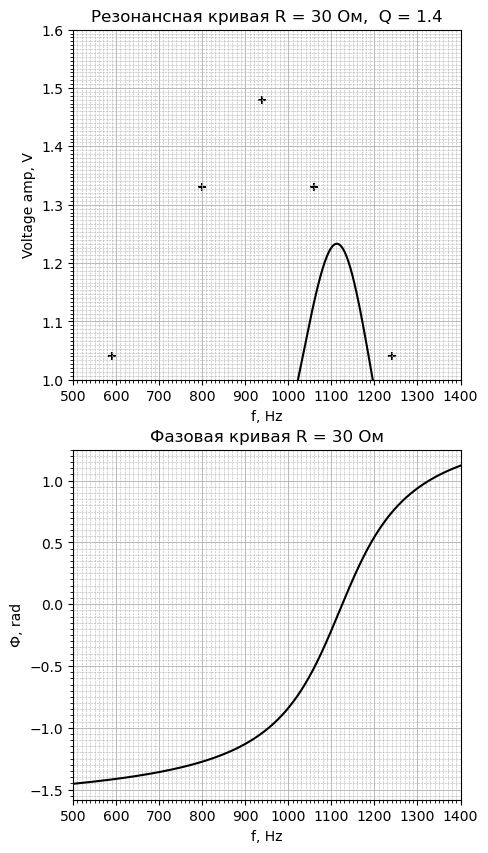

In [68]:
#Резонанс кривые
fig, axs = plt.subplots(2,1, figsize = (5,10))
Uv = np.array([1.04, 1.33, 1.48, 1.33, 1.04])
f = np.array([590, 800, 940, 1060, 1240])
Q = 940/(1240-590)
b = 30/2/L
w0 = 940*2*np.pi
Q2 = 1/30*(L/C)**0.5
u0 = 1.48*2*b*w0*(1-(b/w0)**2)**0.5
print(Q2)
axs[0].set_xlim(500, 1400)
axs[0].set_ylim(1, 1.6)
axs[0].set_title(f"Резонансная кривая R = 30 Ом,  Q = {round(Q, 1)}")
axs[0].set_xlabel("f, Hz")
axs[0].set_ylabel("Voltage amp, V")
axs[0].minorticks_on()
axs[0].scatter(f, Uv, s = 35, color = "black", marker = "+")
axs[0].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(15))
axs[0].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[0].grid(which = 'major', linewidth = 0.6)
x = np.linspace(500, 1400, 600)
y = np.arctan((x*np.pi*40*10**(-3)-1/(x*2*np.pi*10**(-6)))/30)
axs[1].set_xlim(500, 1400)
axs[1].plot(x, y, color = "black")
axs[1].set_title(f"Фазовая кривая R = 30 Ом")
axs[1].set_xlabel("f, Hz")
axs[1].set_ylabel("Ф, rad")
axs[1].minorticks_on()
axs[1].xaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].grid(which = 'minor', linestyle='--', linewidth = 0.4)
axs[1].grid(which = 'major', linewidth = 0.6)
rez = u0/((1/L/C-(x*2*np.pi)**2)**2+(2*b*x*2*np.pi)**2)**0.5
axs[0].plot(x, rez, color = "black")
plt.show()